<a href="https://colab.research.google.com/github/navendu10/MLmodels_NB/blob/main/SimpleRNN_Sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [8]:
series = np.sin(0.1 * np.arange(200)) #+ np.random.randn(200) * 0.2

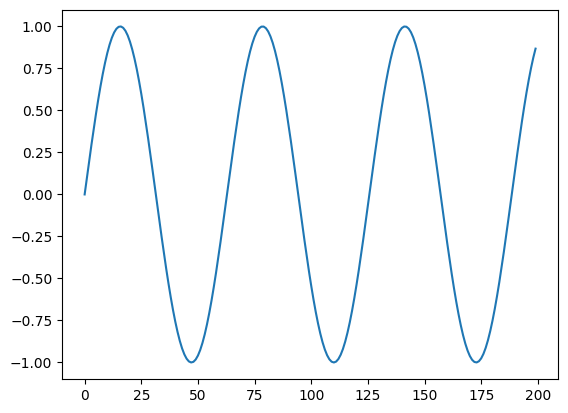

In [9]:
plt.plot(series)
plt.show()

In [11]:
T = 10
D = []
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

In [12]:
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, "Y.shape: ", Y.shape)

X.shape:  (190, 10, 1) Y.shape:  (190,)


In [30]:
i = Input(shape = (T,1))
x = SimpleRNN(15)(i)
x = Dense(1)(x)
model = Model(i,x)

In [31]:
model.compile(loss = 'mse',
              optimizer = Adam(learning_rate = 0.001),
              )

In [32]:
r = model.fit(X[:-N//2], Y[:-N//2],
          epochs = 80,
          validation_data = (X[-N//2:], Y[-N//2:]),
          )

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 0.1052 - val_loss: 0.0452
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0328 - val_loss: 0.0121
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0114 - val_loss: 0.0101
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0143 - val_loss: 0.0146
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0183 - val_loss: 0.0122
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0126 - val_loss: 0.0068
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0055 - val_loss: 0.0037
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0048 - val_loss: 0.0033
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0036 - val_loss: 0.0023
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0022 - val_loss: 0.0020


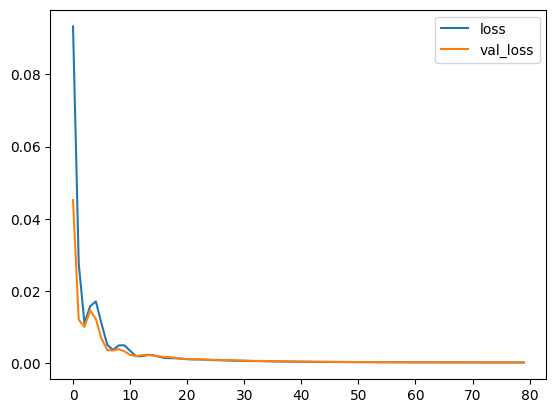

In [33]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [28]:
i = Input(shape = (T, 1))
x = SimpleRNN(30, activation = 'relu')(i)
x = Dense(1)(x)
model = Model(i,x)

model.compile(loss = 'mse',
              optimizer = Adam(learning_rate = 0.0001),
              )

r = model.fit(X[:-N//2], Y[:-N//2],
          epochs = 80,
          validation_data = (X[-N//2:], Y[-N//2:]),
          )

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - loss: 0.5067 - val_loss: 0.5884
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4845 - val_loss: 0.5788
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4739 - val_loss: 0.5692
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4662 - val_loss: 0.5600
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4345 - val_loss: 0.5512
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4551 - val_loss: 0.5422
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4625 - val_loss: 0.5335
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4191 - val_loss: 0.5253
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4600 - val_loss: 0.5170
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4317 - val_loss: 0.5091
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4368 - val_loss: 0.5014
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4364 - val_loss: 0.4939


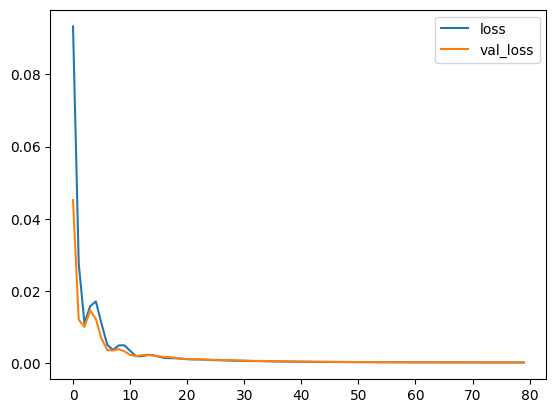

In [36]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [34]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━

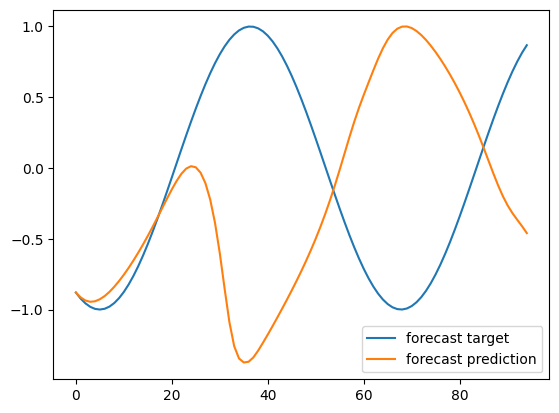

In [35]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()